In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import L2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [18]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [19]:
#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [22]:
def Create_model(init=None,drop=0.0,reg=None):
    model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(512,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(256,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(128,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(10,activation='softmax')
        ])
    return model


In [23]:
base_model=Create_model(drop=0.25,reg=L2(0.001))
base_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
base_history=base_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7780 - loss: 1.3650 - val_accuracy: 0.9303 - val_loss: 0.6103
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8846 - loss: 0.7723 - val_accuracy: 0.9352 - val_loss: 0.6089
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8845 - loss: 0.7506 - val_accuracy: 0.9350 - val_loss: 0.5549
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8854 - loss: 0.7309 - val_accuracy: 0.9370 - val_loss: 0.5336
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8826 - loss: 0.7279 - val_accuracy: 0.9282 - val_loss: 0.5399
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8825 - loss: 0.7156 - val_accuracy: 0.9312 - val_loss: 0.5473
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8850 - loss: 0.6999 - val_accuracy: 0.9342 - val_loss: 0.5192
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8794 - loss: 0.7305 - val_accuracy: 0.

In [24]:
test_loss,test_accuracy=base_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 869us/step - accuracy: 0.9257 - loss: 0.5202
Test Accuracy :0.9257


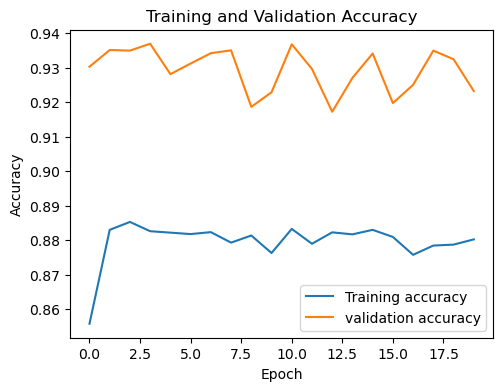

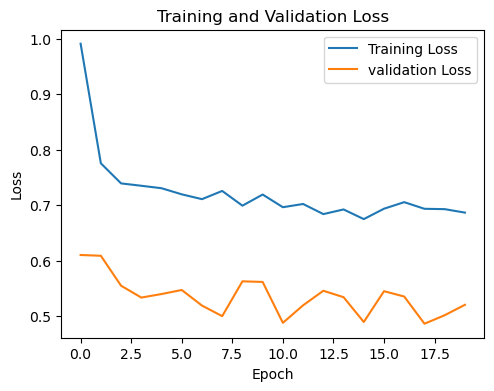

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(base_history.history['accuracy'],label='Training accuracy')
plt.plot(base_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(base_history.history['loss'],label='Training Loss')
plt.plot(base_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

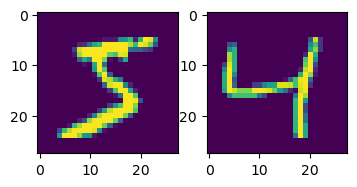

In [30]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(x_train[2])
plt.show()
